In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
df=pd.read_csv("data.csv",names=["English speaker","Course instructor","Course","Semester","Class size","Class attribute"])

   1. Whether or not the TA is a native English speaker (binary)
      1=English speaker, 2=non-English speaker
   2. Course instructor (categorical, 25 categories)
   3. Course (categorical, 26 categories)
   4. Summer or regular semester (binary) 1=Summer, 2=Regular
   5. Class size (numerical)
   6. Class attribute (categorical) 1=Low, 2=Medium, 3=High

# EDA

In [13]:
df.shape

(151, 6)

In [14]:
df.head()

,English speaker,Course instructor,Course,Semester,Class size,Class attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   English speaker    151 non-null    int64
 1   Course instructor  151 non-null    int64
 2   Course             151 non-null    int64
 3   Semester           151 non-null    int64
 4   Class size         151 non-null    int64
 5   Class attribute    151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [16]:
df.describe()

,English speaker,Course instructor,Course,Semester,Class size,Class attribute
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


### Observations

1. Maximum number of students in class is 66 


## Finding Missing values

In [17]:
df.isnull().sum()

English speaker      0
Course instructor    0
Course               0
Semester             0
Class size           0
Class attribute      0
dtype: int64

There are no missing values in dataset

In [18]:
df.corr()

,English speaker,Course instructor,Course,Semester,Class size,Class attribute
English speaker,1.000000,-0.250510,0.134660,0.214417,-0.151547,-0.255466
Course instructor,-0.250510,1.000000,-0.236010,-0.168573,-0.035765,0.075095
Course,0.134660,-0.236010,1.000000,0.224927,-0.033485,0.143103
Semester,0.214417,-0.168573,0.224927,1.000000,0.269554,-0.282742
Class size,-0.151547,-0.035765,-0.033485,0.269554,1.000000,-0.035676
Class attribute,-0.255466,0.075095,0.143103,-0.282742,-0.035676,1.000000


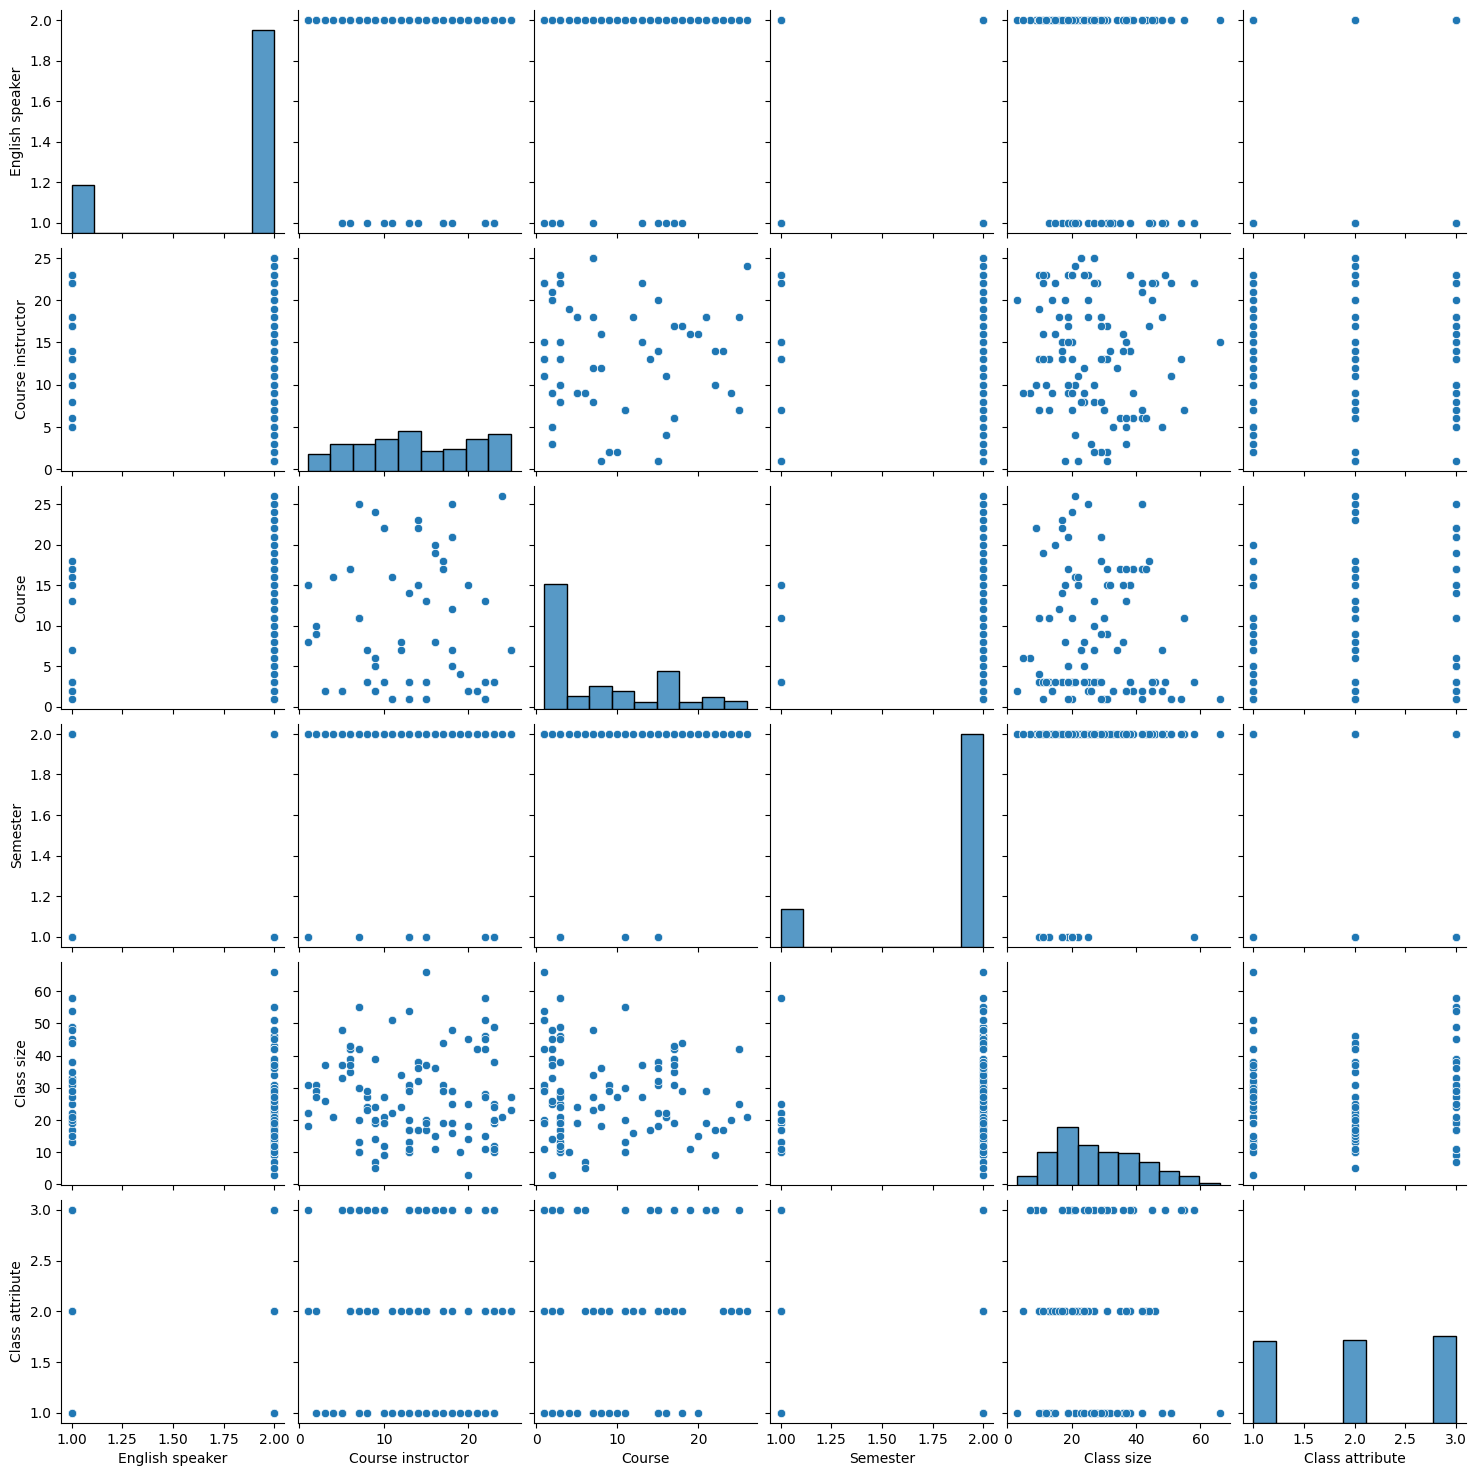

In [19]:
sns.pairplot(df)

In [20]:
df.head()

,English speaker,Course instructor,Course,Semester,Class size,Class attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [21]:
from sklearn.model_selection import train_test_split
X = df.drop('Class attribute', axis=1)
y = df["Class attribute"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

SVC(gamma=0.1)

In [23]:
pred = svm_clf.predict(X_train)
from sklearn.metrics import accuracy_score
print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")

Accuracy Score: 93.33%


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)
#output:
RandomForestClassifier(n_estimators=1000, random_state=42)

predrf = rf_clf.predict(X_train)
print(f"Accuracy Score:{accuracy_score(y_train,predrf)*100:.2f}%")

Accuracy Score:97.14%


<Axes: >

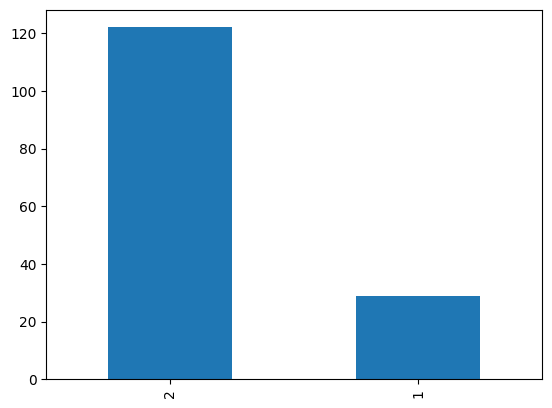

In [36]:
df["English speaker"].value_counts().plot(kind='bar')


<Axes: >

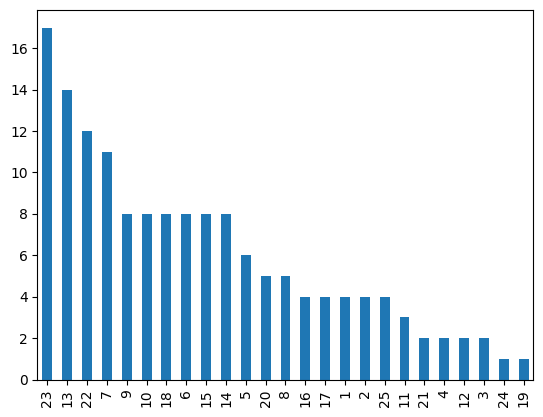

In [30]:
df["Course instructor"].value_counts().plot(kind='bar')


<Axes: >

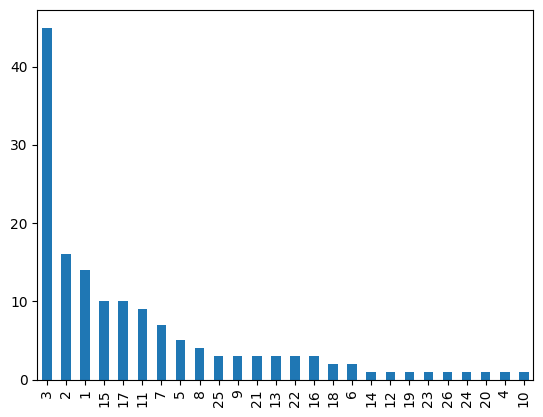

In [31]:
df["Course"].value_counts().plot(kind='bar')

<Axes: >

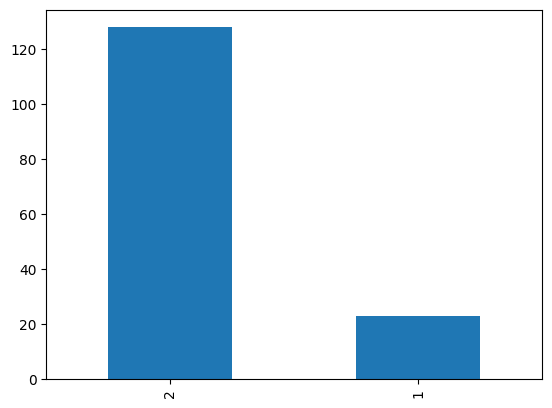

In [32]:

df["Semester"].value_counts().plot(kind='bar')


<Axes: >

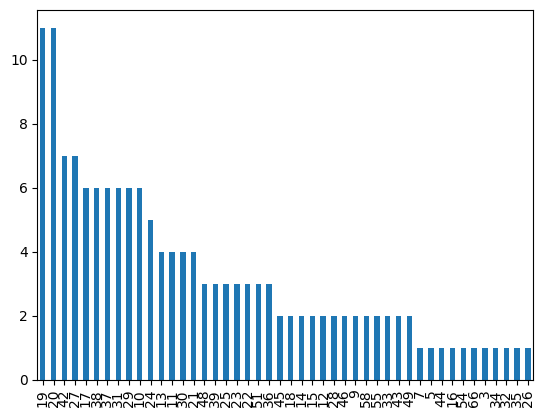

In [33]:
df["Class size"].value_counts().plot(kind='bar')

<Axes: >

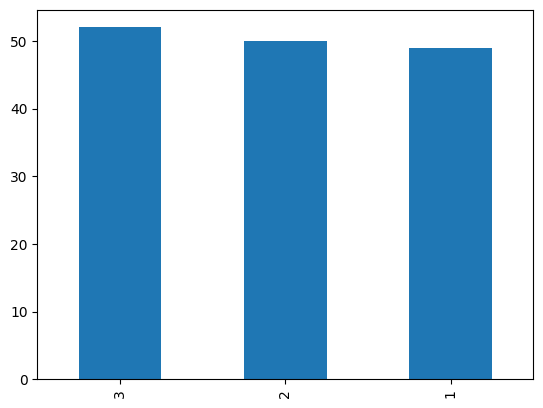

In [34]:
df["Class attribute"].value_counts().plot(kind='bar')

## Bivariate analysis

In [38]:
df.sample(5)

,English speaker,Course instructor,Course,Semester,Class size,Class attribute
72,1,13,3,1,13,1
40,2,15,3,1,17,3
150,2,2,10,2,27,1
100,1,6,17,2,35,2
144,2,19,4,2,10,1


<Axes: xlabel='Class size', ylabel='Course instructor'>

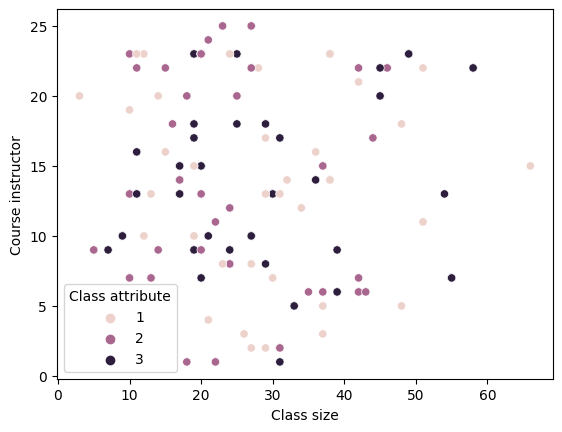

In [47]:
sns.scatterplot(x=df["Class size"],y=df["Course instructor"],hue=df["Class attribute"])

<Axes: xlabel='Class size', ylabel='Semester'>

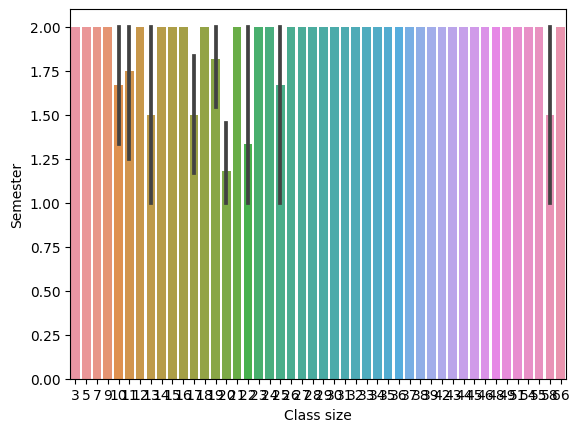

In [49]:
sns.barplot(x=df["Class size"],y=df["Semester"])

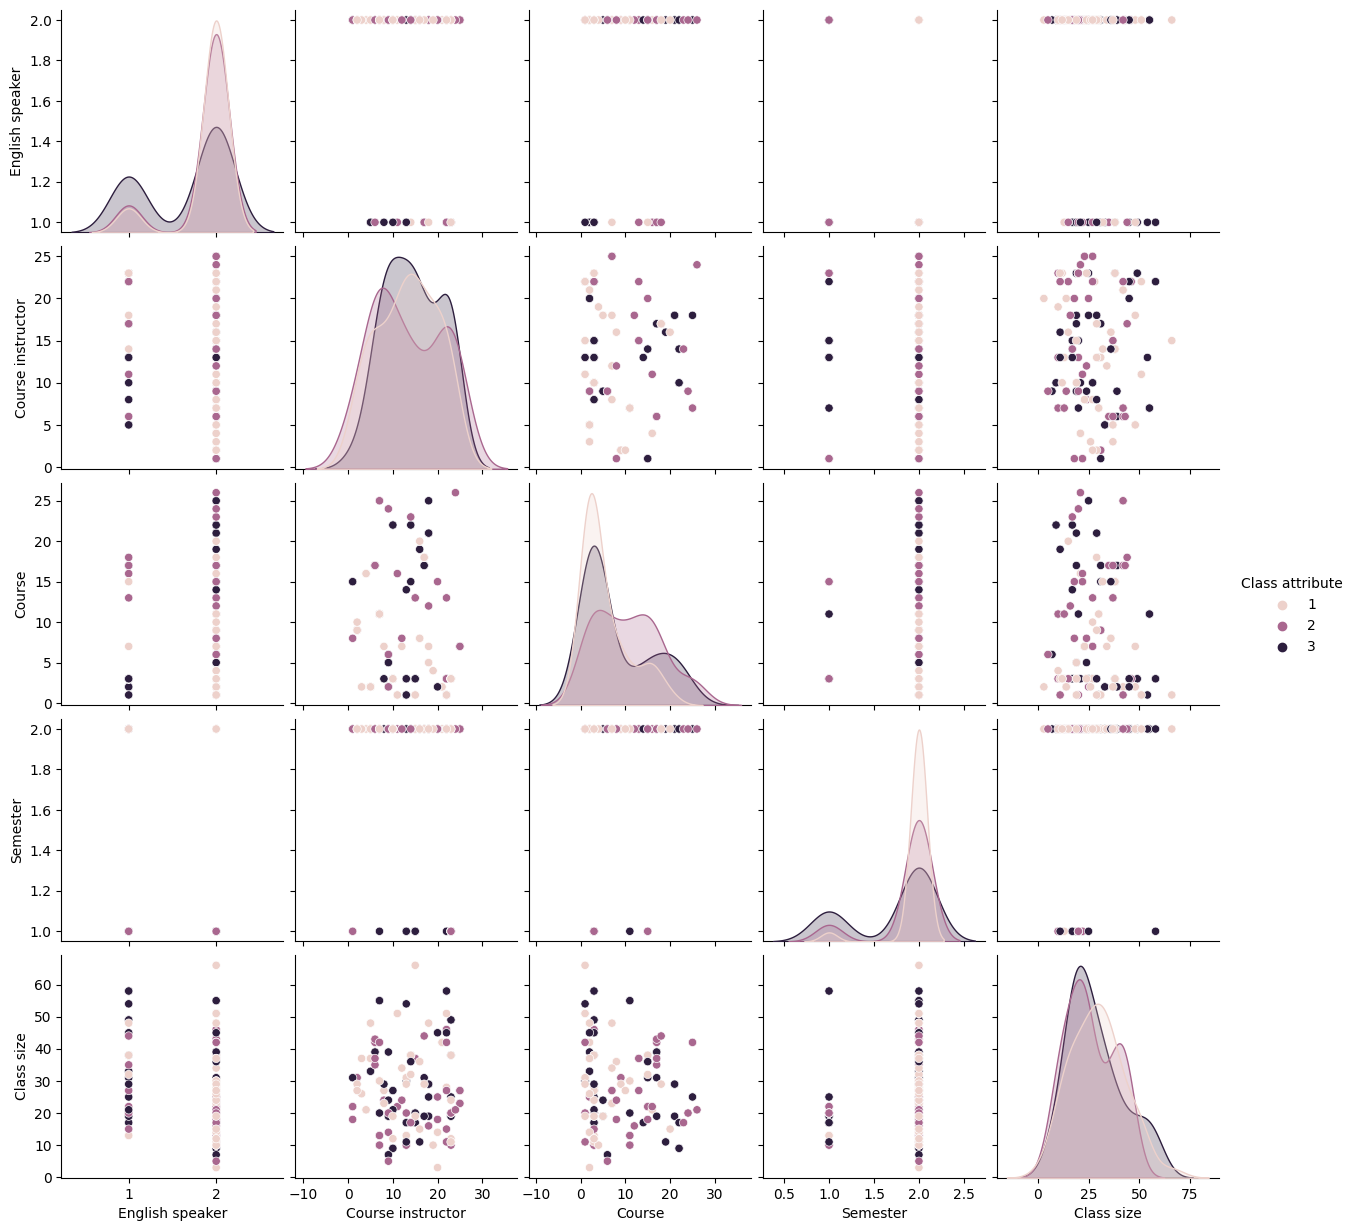

In [50]:
sns.pairplot(df,hue="Class attribute")

<Axes: xlabel='English speaker', ylabel='Class size'>

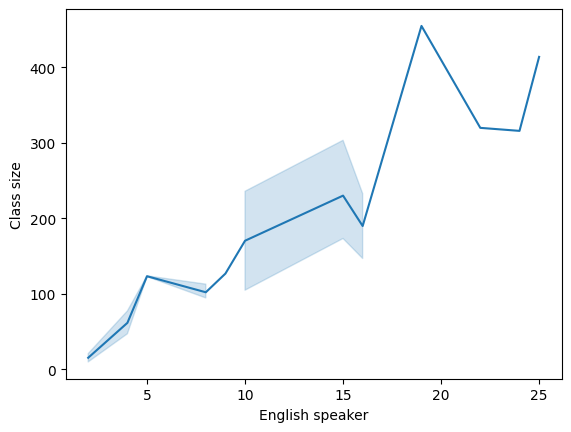

In [59]:
new=df.groupby(["Course instructor"]).sum().reset_index()
sns.lineplot(x=new["English speaker"],y=new["Class size"])